In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
data = pd.read_csv('Labour_training.csv')

In [4]:
data.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [5]:
data.tail()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
15987,22,HighSchool,black,NotHispanic,NotMarried,0,3975.352,6801.435,2757.438
15988,20,HighSchool,black,NotHispanic,Married,0,1445.939,11832.240,6895.072
15989,37,HighSchool,NotBlack,NotHispanic,NotMarried,0,1733.951,1559.371,4221.865
15990,47,LessThanHighSchool,NotBlack,NotHispanic,Married,1,16914.350,11384.660,13671.930
15991,40,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,13628.660,13144.550,7979.724


In [6]:
data.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [8]:
data.isnull().sum()
data = data.dropna()

In [9]:
df_encoded = pd.get_dummies(data, columns=['Eduacation', 'Race', 'Hisp', 'MaritalStatus'], drop_first=True)


In [10]:
X = df_encoded.drop(columns=['Earnings_1978'])
y = df_encoded['Earnings_1978']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Residuals
residuals = y_test - y_pred

In [13]:
y_pred = model.predict(X_test)


In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared Score: {r2:.2f}")

Mean Squared Error: 48625764.00
R-Squared Score: 0.48


In [16]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("Feature Coefficients:")
display(coefficients)

Feature Coefficients:


,Feature,Coefficient
0,Age,-107.350492
1,Nodeg,-29.339019
2,Earnings_1974,0.283039
3,Earnings_1975,0.475135
4,Eduacation_Intermediate,274.149983
5,Eduacation_LessThanHighSchool,-29.339019
6,Eduacation_PostGraduate,1059.095110
7,Eduacation_graduate,1033.137733
8,Race_black,-857.181352
9,Hisp_hispanic,-442.428781


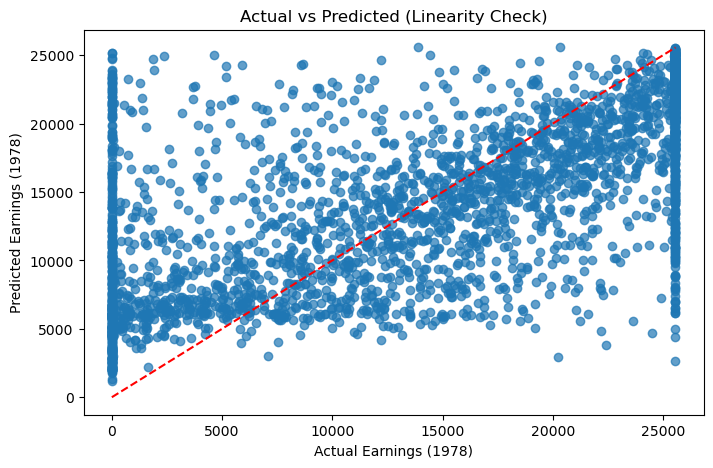

In [24]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted (Linearity Check)")
plt.xlabel("Actual Earnings (1978)")
plt.ylabel("Predicted Earnings (1978)")
plt.show()


In [25]:
dw_test = sm.stats.durbin_watson(residuals)
print(f"Durbin-Watson Test Statistic: {dw_test}")
# Values close to 2 indicate no autocorrelation.


Durbin-Watson Test Statistic: 1.9323083671337922


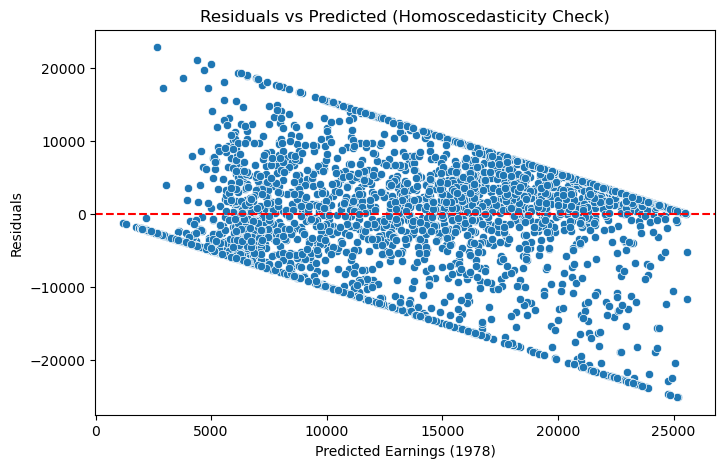

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted (Homoscedasticity Check)")
plt.xlabel("Predicted Earnings (1978)")
plt.ylabel("Residuals")
plt.show()


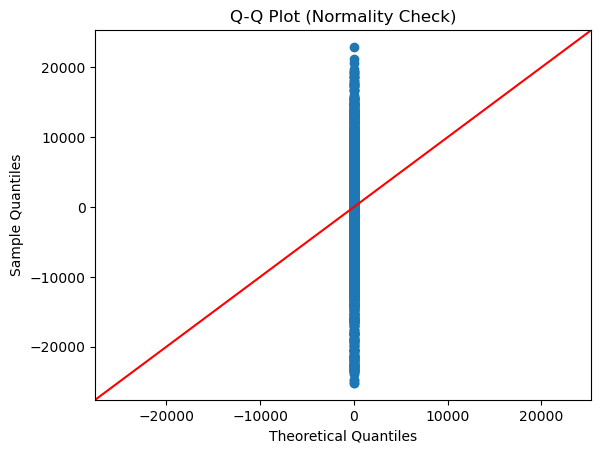

D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


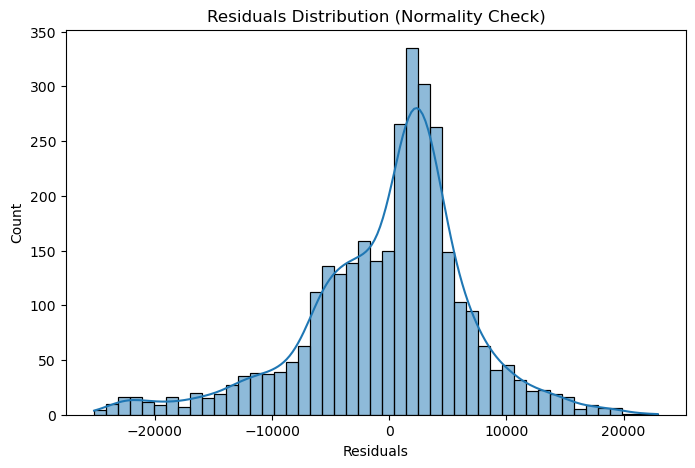

In [27]:
# Q-Q plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot (Normality Check)")
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution (Normality Check)")
plt.xlabel("Residuals")
plt.show()
